## 데이터 확인 및 처리

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings('ignore')

sns.set_palette('pastel')
matplotlib.rcParams['axes.unicode_minus'] = False
plt.rc('font',  family='malgun gothic')

In [2]:
online_sales = pd.read_csv('./dataset/Onlinesales_info.csv')
customers_data = pd.read_csv('./dataset/Customer_info.csv')
discount_coupon = pd.read_csv('./dataset/Discount_info.csv')
marketing_spend = pd.read_csv('./dataset/Marketing_info.csv')
tax_amount = pd.read_csv('./dataset/Tax_info.csv')

In [3]:
online_sales.head(3)

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.5,Used


In [4]:
online_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   고객ID    52924 non-null  object 
 1   거래ID    52924 non-null  object 
 2   거래날짜    52924 non-null  object 
 3   제품ID    52924 non-null  object 
 4   제품카테고리  52924 non-null  object 
 5   수량      52924 non-null  int64  
 6   평균금액    52924 non-null  float64
 7   배송료     52924 non-null  float64
 8   쿠폰상태    52924 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 3.6+ MB


In [5]:
customers_data.head(3)

,고객ID,성별,고객지역,가입기간
0,USER_1358,남,Chicago,12
1,USER_0190,남,California,43
2,USER_0066,남,Chicago,33


In [6]:
if customers_data.고객ID.nunique() == online_sales.고객ID.nunique():
    print('online_sale, customer_data 고객 id의 정합성이 지켜져있습니다.')

online_sale, customer_data 고객 id의 정합성이 지켜져있습니다.


In [7]:
discount_coupon.head(3)

,월,제품카테고리,쿠폰코드,할인율
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30


In [8]:
def transform_month(month):
    month_mapping = {
        'Jan': '2019-01',
        'Feb': '2019-02',
        'Mar': '2019-03',
        'Apr': '2019-04',
        'May': '2019-05',
        'Jun': '2019-06',
        'Jul': '2019-07',
        'Aug': '2019-08',
        'Sep': '2019-09',
        'Oct': '2019-10',
        'Nov': '2019-11',
        'Dec': '2019-12'
    }
    
    return month_mapping[month]

discount_coupon['월'] = discount_coupon['월'].map(transform_month)
discount_coupon

,월,제품카테고리,쿠폰코드,할인율
0,2019-01,Apparel,SALE10,10
1,2019-02,Apparel,SALE20,20
2,2019-03,Apparel,SALE30,30
3,2019-01,Nest-USA,ELEC10,10
4,2019-02,Nest-USA,ELEC20,20
...,...,...,...,...
199,2019-11,Notebooks & Journals,NJ20,20
200,2019-12,Notebooks & Journals,NJ30,30
201,2019-10,Android,AND10,10
202,2019-11,Android,AND20,20


In [9]:
marketing_spend.head(3)

,날짜,오프라인비용,온라인비용
0,2019-01-01,4500,2424.50
1,2019-01-02,4500,3480.36
2,2019-01-03,4500,1576.38


In [10]:
tax_amount.head()

,제품카테고리,GST
0,Nest-USA,0.10
1,Office,0.10
2,Apparel,0.18
3,Bags,0.18
4,Drinkware,0.18


In [11]:
online_sales[['수량', '평균금액', '배송료']].describe()

,수량,평균금액,배송료
count,52924.000000,52924.000000,52924.000000
mean,4.497638,52.237646,10.517630
std,20.104711,64.006882,19.475613
min,1.000000,0.390000,0.000000
25%,1.000000,5.700000,6.000000
50%,1.000000,16.990000,6.000000
75%,2.000000,102.130000,6.500000
max,900.000000,355.740000,521.360000


## 시각화

### 거래데이터 시각화

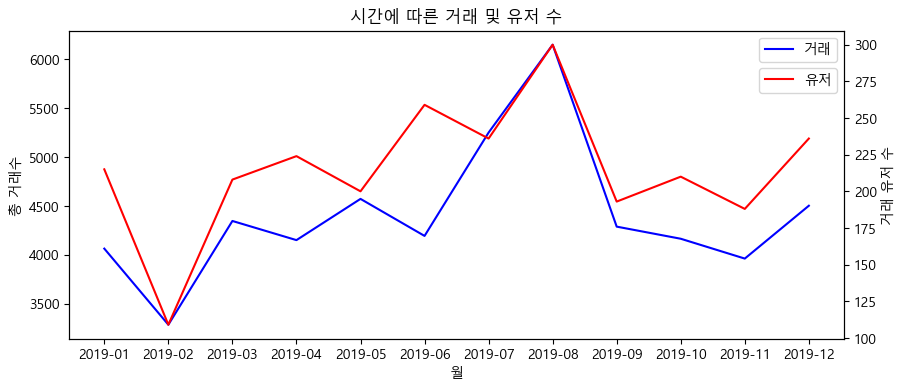

In [12]:
trans_counts_by_month =online_sales.assign(Month = pd.to_datetime(online_sales['거래날짜']).dt.to_period('M')).groupby('Month')['거래ID'].count().sort_index()
user_counts_by_month = online_sales.assign(Month = pd.to_datetime(online_sales['거래날짜']).dt.to_period('M')).groupby('Month')['고객ID'].nunique()

fig, ax1 = plt.subplots(figsize = (10, 4))

ax2 = ax1.twinx()

g1 = sns.lineplot( x = trans_counts_by_month.index.astype(str), y = trans_counts_by_month.values, color = 'blue', ax = ax1)
ax1.set_ylabel('총 거래수')

g2 = sns.lineplot( x = user_counts_by_month.index.astype(str), y = user_counts_by_month.values, color = 'red', ax = ax2)
ax2.set_ylabel('거래 유저 수')

ax1.legend(['거래'], loc = 'upper right')
ax2.legend(['유저'], bbox_to_anchor = (1,0.9))

ax1.set_xlabel('월')

plt.title('시간에 따른 거래 및 유저 수')
plt.show()

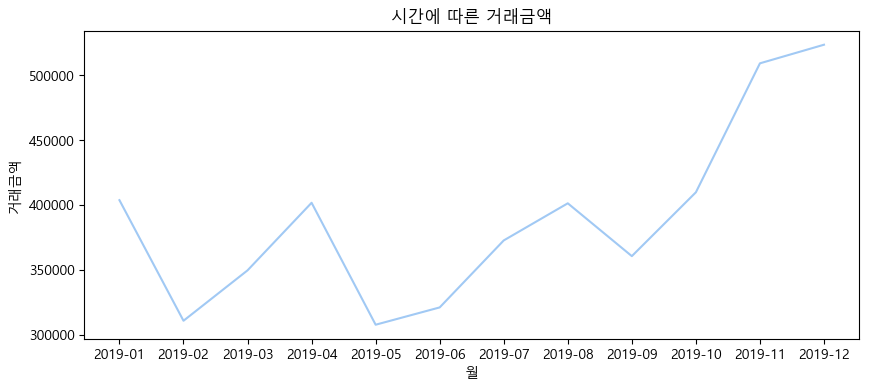

In [13]:
total_price_by_month = online_sales.assign(Month = pd.to_datetime(online_sales['거래날짜']).dt.to_period('M'), 
                    total_price = online_sales['수량'] * online_sales['평균금액']).groupby('Month')['total_price'].sum()

plt.figure(figsize = (10, 4))
sns.lineplot( x = total_price_by_month.index.astype(str),
              y = total_price_by_month.values)
plt.title('시간에 따른 거래금액')
plt.xlabel('월')
plt.ylabel('거래금액')
# plt.xticks(rotation = 45)
plt.show()

In [14]:
online_sales.groupby('제품카테고리')['평균금액'].mean().sort_values(ascending = False)

제품카테고리
Nest                    194.221074
Nest-Canada             157.243249
Nest-USA                124.331850
Gift Cards              111.363270
Backpacks                80.046404
Bags                     29.830797
Apparel                  19.788995
More Bags                19.776957
Google                   16.446190
Android                  15.903488
Headgear                 15.879624
Notebooks & Journals     11.758505
Drinkware                10.696893
Accessories               8.211068
Fun                       6.743812
Waze                      6.607852
Lifestyle                 3.860078
Office                    3.770012
Bottles                   3.437201
Housewares                2.060574
Name: 평균금액, dtype: float64

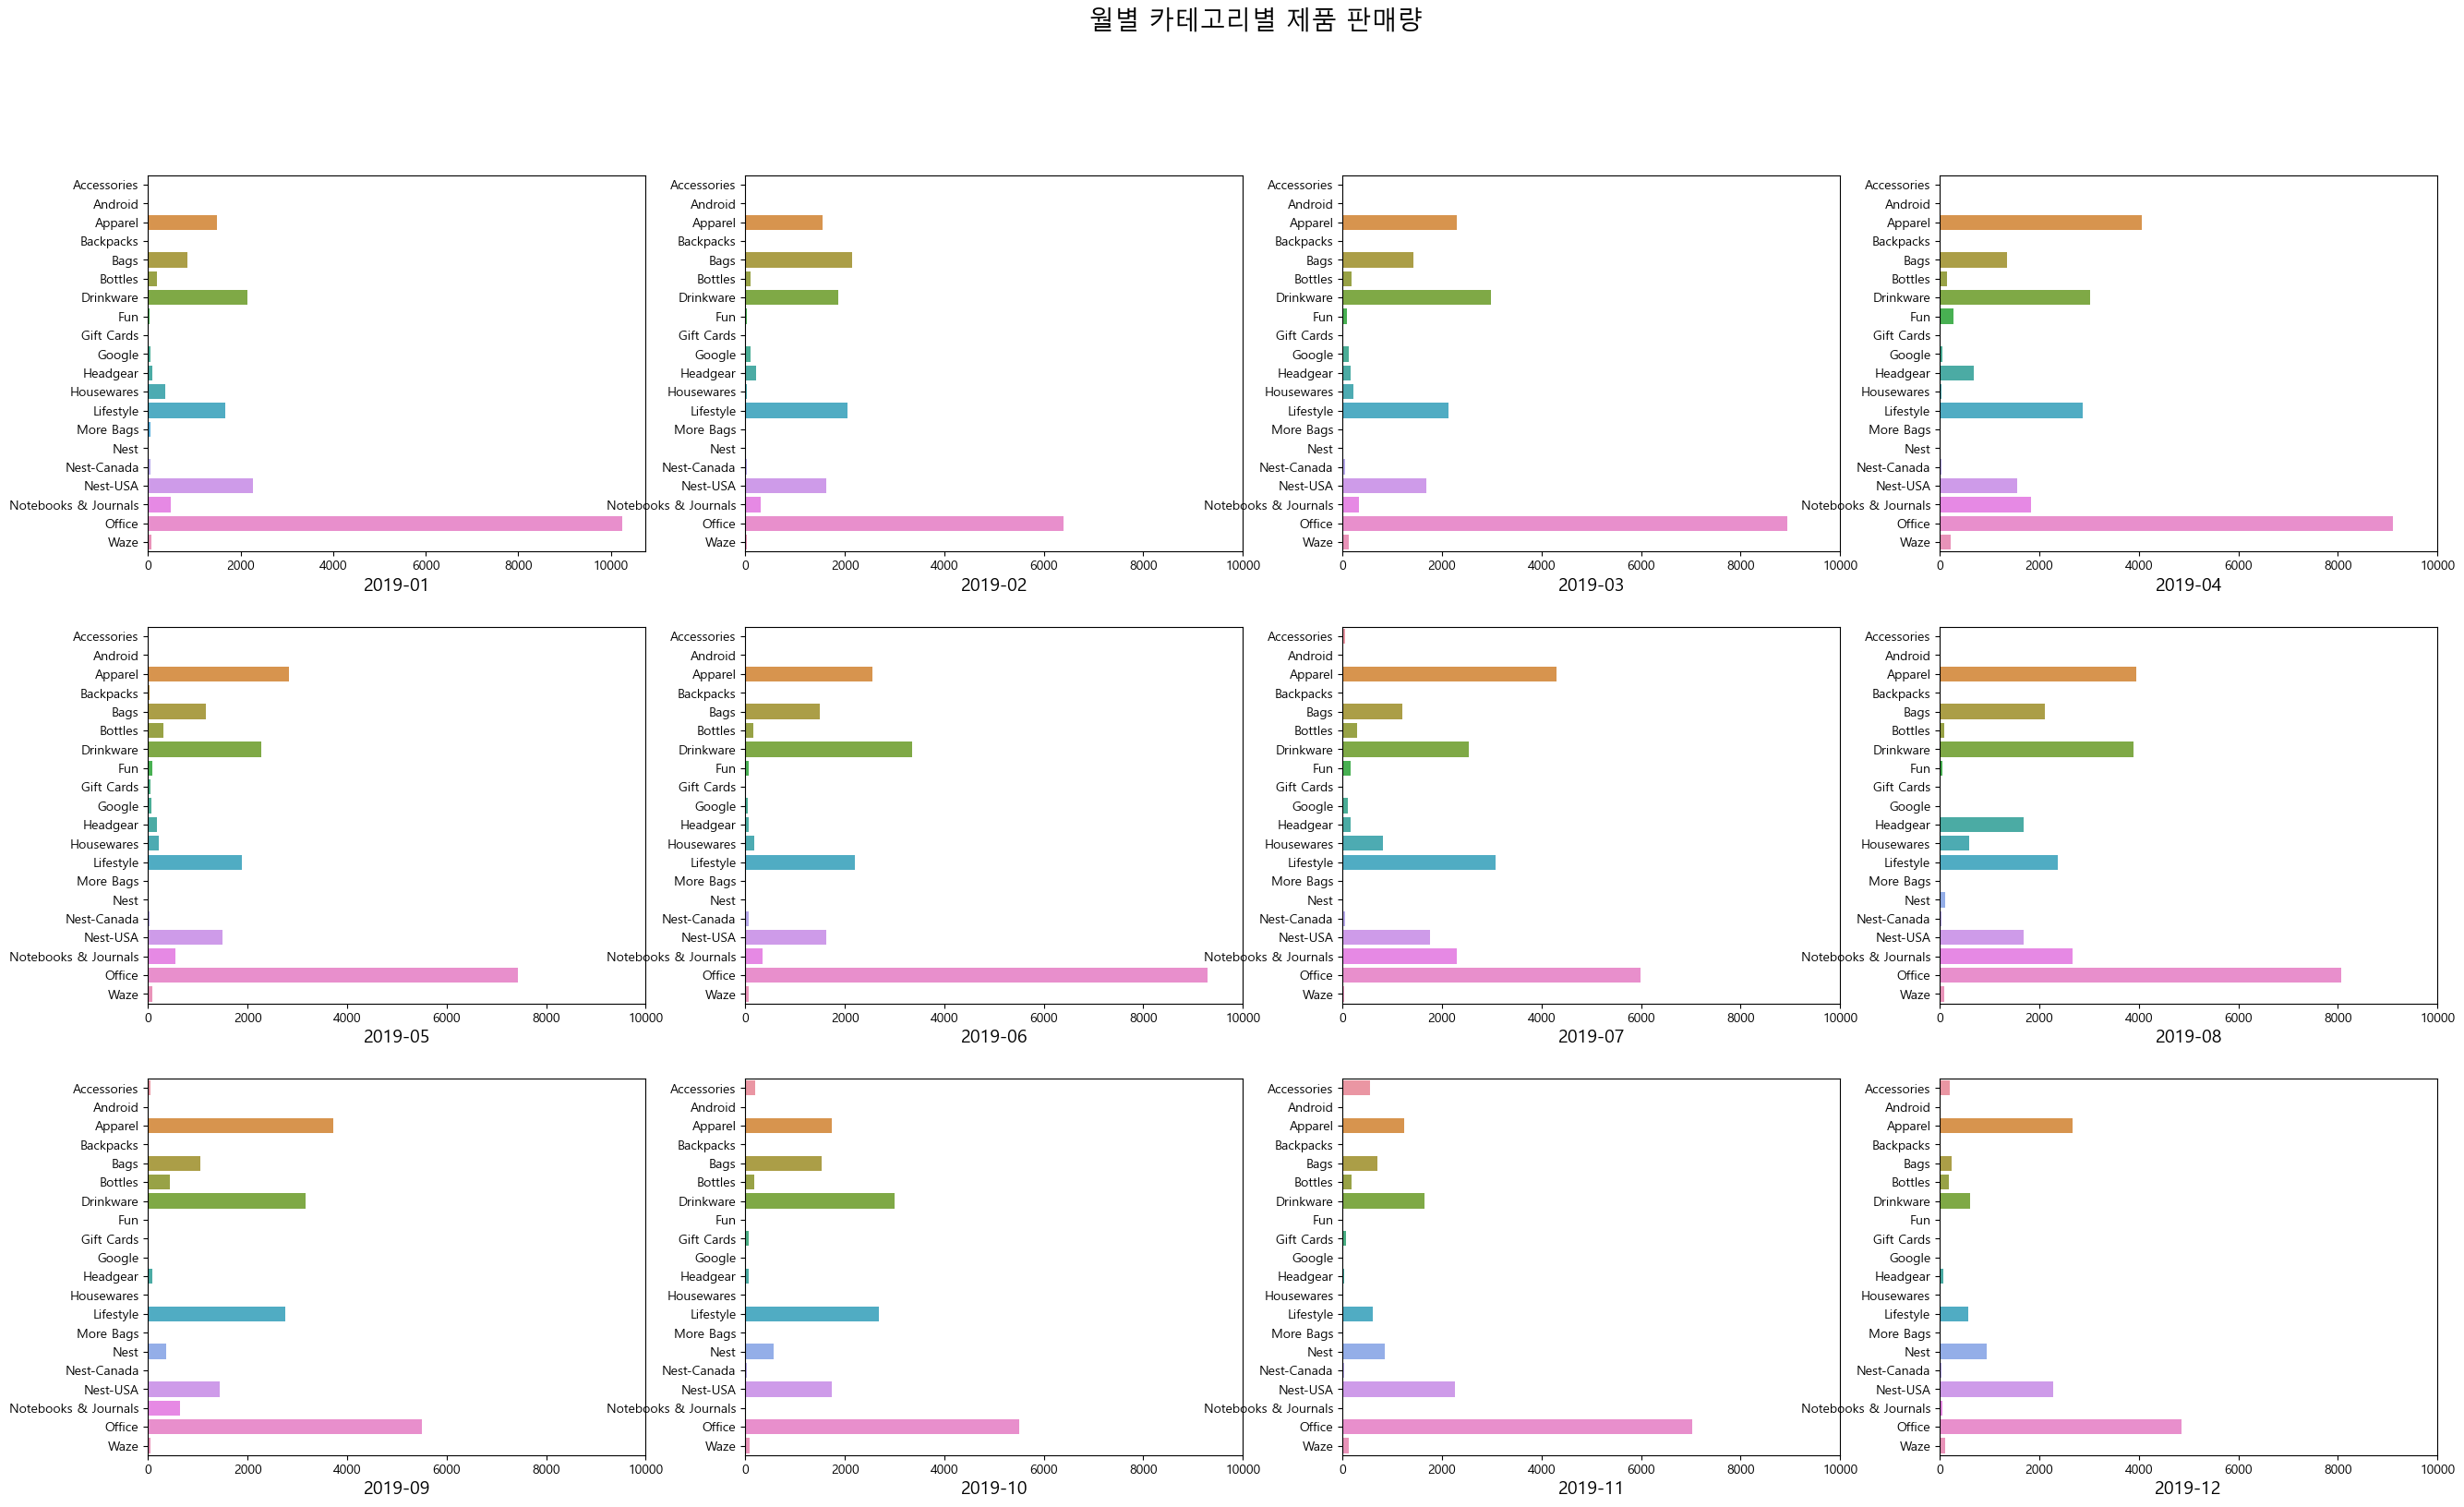

In [15]:
count_cat_by_month = online_sales.assign(Month = pd.to_datetime(online_sales['거래날짜']).dt.to_period('M')).groupby(['Month','제품카테고리'])[['수량']].sum().reset_index()
cat_dict = { k : 0 for k in sorted(online_sales.제품카테고리.unique())}
periods = pd.period_range(start='2019-01', end='2019-12', freq='M')
fig, ax = plt.subplots( nrows = 3, ncols = 4, figsize = (32, 18))

for i in range(12):
    r, c = i//4, i%4
    p = periods[i]
    
    cat_dict.update(count_cat_by_month.query(f'`Month` == @p')[['제품카테고리', '수량']].set_index('제품카테고리').squeeze())
    new_df = pd.DataFrame(cat_dict.values(), cat_dict.keys(), columns = ['수량'])
    
    sns.barplot(data = new_df, x = '수량', y = new_df.index, ax = ax[r][c])
    ax[r][c].set_xticks(range(0,10001, 2000))
    ax[r][c].set_xlabel(p, fontsize = 14)
    ax[r][c].set_ylabel('')
plt.suptitle('월별 카테고리별 제품 판매량', fontsize = 20)
plt.show()
    

In [78]:
round(online_sales.assign(total_price = online_sales['수량'] * online_sales['평균금액'], Month = pd.to_datetime(online_sales['거래날짜']).dt.to_period('M')).groupby(['Month','제품카테고리'])[['평균금액']].sum().reset_index()['평균금액'].max())

203025

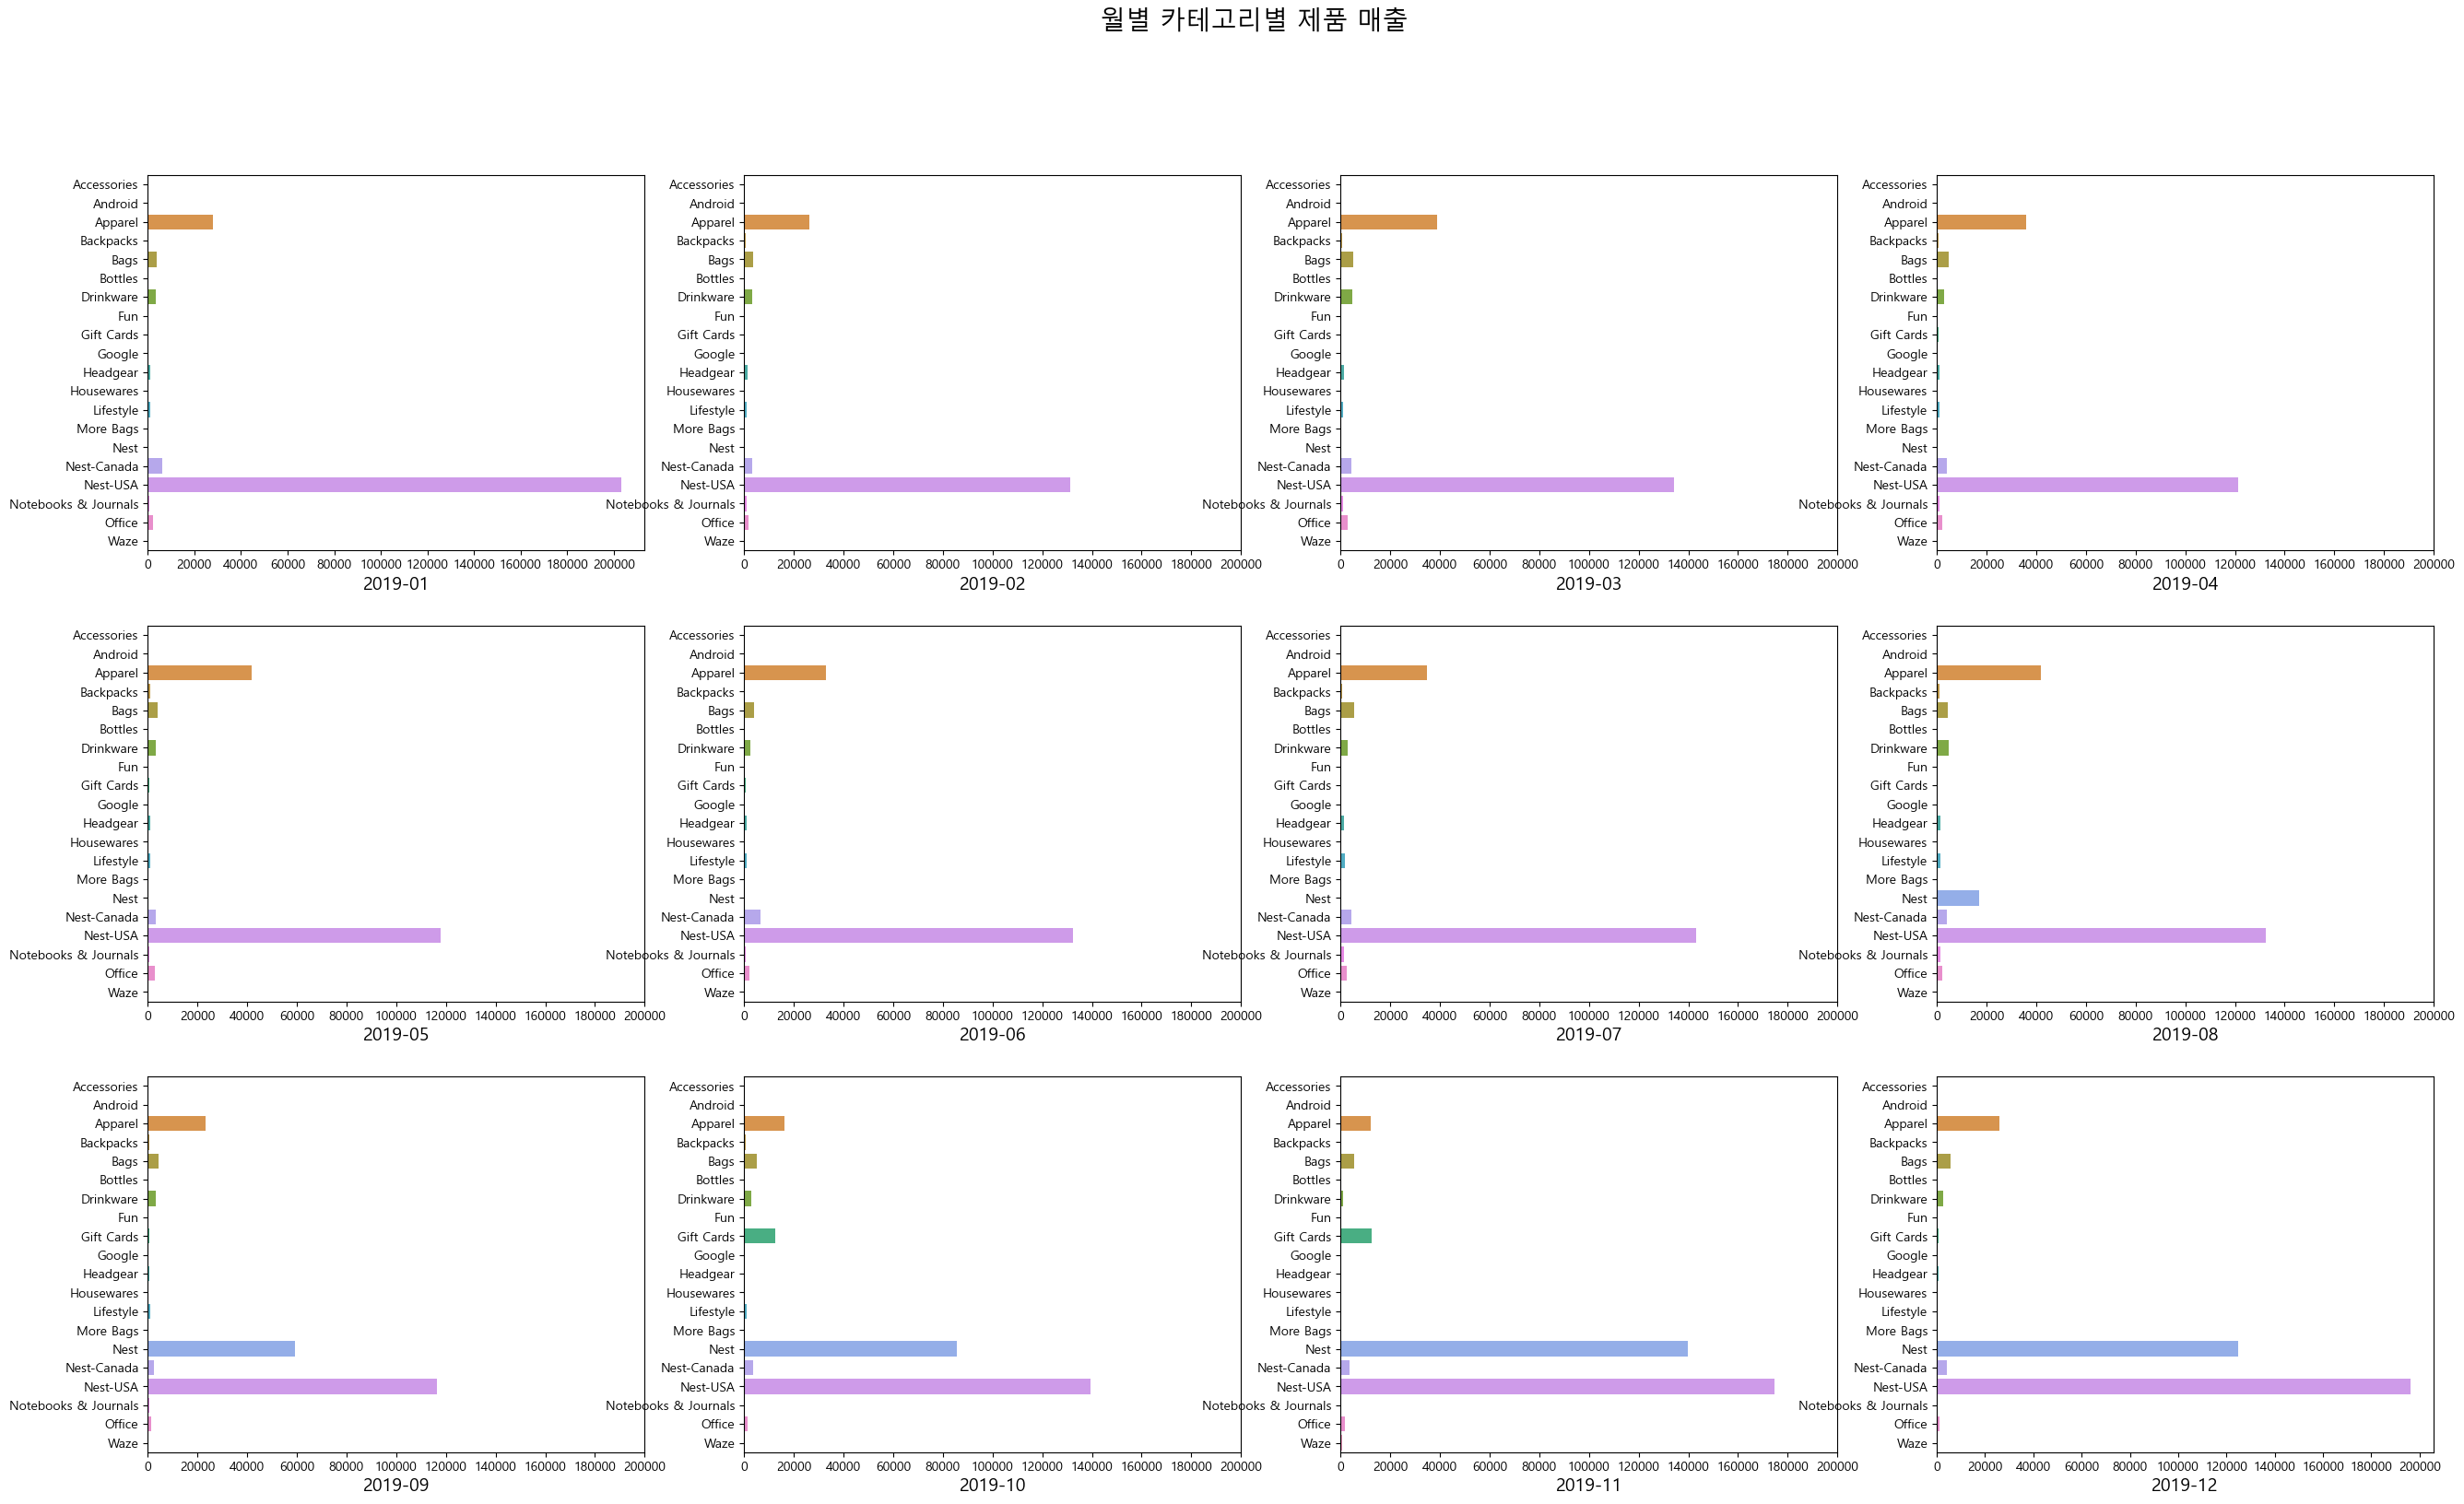

In [82]:
sales_cat_by_month = online_sales.assign(total_price = online_sales['수량'] * online_sales['평균금액'], Month = pd.to_datetime(online_sales['거래날짜']).dt.to_period('M')).groupby(['Month','제품카테고리'])[['평균금액']].sum().reset_index()
cat_dict = { k : 0 for k in sorted(online_sales.제품카테고리.unique())}
periods = pd.period_range(start='2019-01', end='2019-12', freq='M')
fig, ax = plt.subplots( nrows = 3, ncols = 4, figsize = (32, 18))

for i in range(12):
    r, c = i//4, i%4
    p = periods[i]
    
    cat_dict.update(sales_cat_by_month.query(f'`Month` == @p')[['제품카테고리', '평균금액']].set_index('제품카테고리').squeeze())
    new_df = pd.DataFrame(cat_dict.values(), cat_dict.keys(), columns = ['평균금액'])
    
    sns.barplot(data = new_df, x = '평균금액', y = new_df.index, ax = ax[r][c])
    ax[r][c].set_xticks(range(0, round(sales_cat_by_month['평균금액'].max()), 20000))
    ax[r][c].set_xlabel(p, fontsize = 14)
    ax[r][c].set_ylabel('')
plt.suptitle('월별 카테고리별 제품 매출', fontsize = 20)
plt.show()

In [16]:
discount_coupon.groupby('월')['할인율'].mean()

월
2019-01    10.0
2019-02    20.0
2019-03    30.0
2019-04    10.0
2019-05    20.0
2019-06    30.0
2019-07    10.0
2019-08    20.0
2019-09    30.0
2019-10    10.0
2019-11    20.0
2019-12    30.0
Name: 할인율, dtype: float64

In [17]:
online_sales.assign(Month = pd.to_datetime(online_sales['거래날짜']).dt.to_period('M')).groupby(['Month', '쿠폰상태'])[['평균금액']].mean()

평균금액
Month   쿠폰상태               
2019-01 Clicked   62.907210
        Not Used  60.641273
        Used      60.516573
2019-02 Clicked   53.222764
        Not Used  57.078239
        Used      51.274964
2019-03 Clicked   44.220934
        Not Used  46.809680
        Used      45.473462
2019-04 Clicked   43.266008
        Not Used  41.762624
        Used      42.145762
2019-05 Clicked   39.992584
        Not Used  36.792188
        Used      38.836200
2019-06 Clicked   44.256491
        Not Used  45.899671
        Used      43.294433
2019-07 Clicked   37.388499
        Not Used  38.555843
        Used      38.925885
2019-08 Clicked   35.609974
        Not Used  34.746983
        Used      33.454391
2019-09 Clicked   47.787485
        Not Used  51.263176
        Used      52.715779
2019-10 Clicked   65.319797
        Not Used  64.984142
        Used      63.811823
2019-11 Clicked   85.274613
        Not Used  86.490532
        Used      86.880286
2019-12 Clicked   82.540221
        Not Used  81.456088
        Used      77.690456

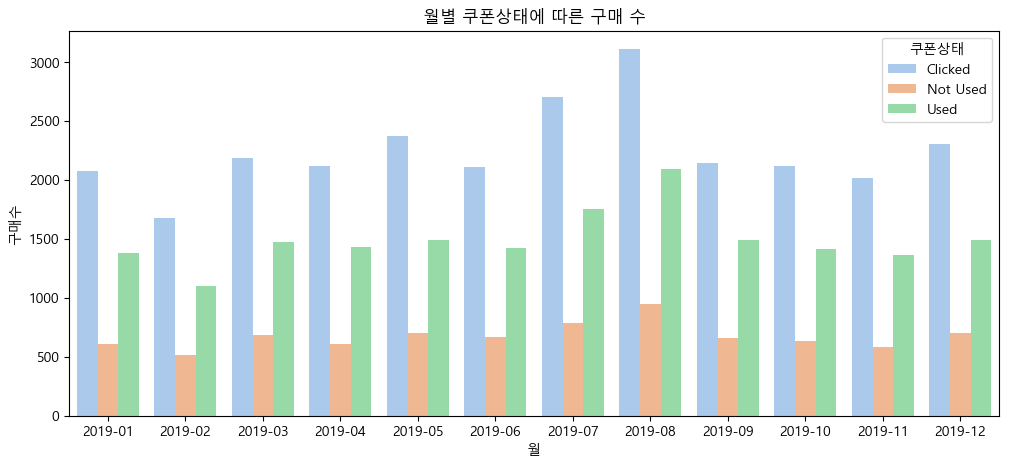

In [18]:
coupon = online_sales.assign(Month = pd.to_datetime(online_sales['거래날짜']).dt.to_period('M')).groupby(['Month', '쿠폰상태'])[['평균금액']].count().reset_index()

plt.figure(figsize = (12, 5))
sns.barplot(data = coupon, x = 'Month', y = '평균금액', hue = '쿠폰상태')

plt.xlabel('월')
plt.ylabel('구매수')
plt.title('월별 쿠폰상태에 따른 구매 수')
plt.show()

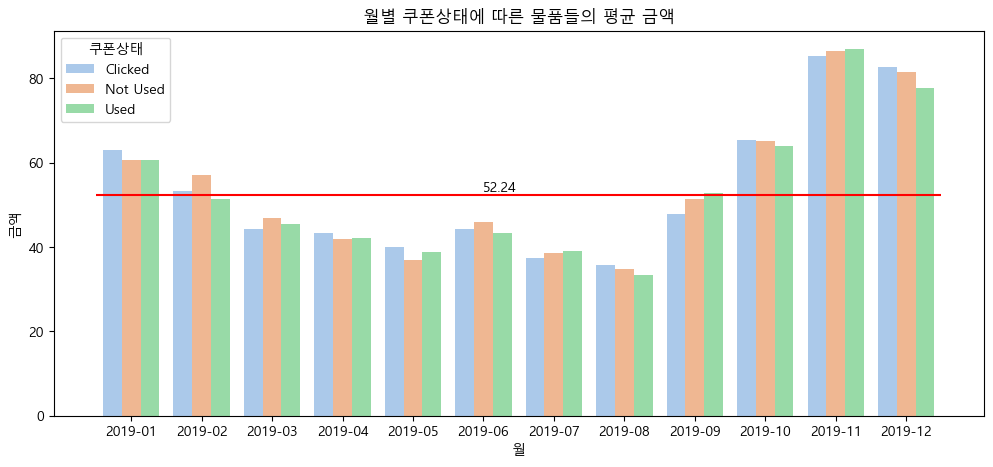

In [19]:
coupon2 = online_sales.assign(Month = pd.to_datetime(online_sales['거래날짜']).dt.to_period('M')).groupby(['Month', '쿠폰상태'])[['평균금액']].mean().reset_index()

plt.figure(figsize = (12, 5))
sns.barplot(data = coupon2, x = 'Month', y = '평균금액', hue = '쿠폰상태')
plt.hlines(online_sales.평균금액.mean(), xmin = -0.5, xmax = 11.5, colors = 'red')
plt.text(s = f'{round(online_sales.평균금액.mean(), 2)}',x = 5, y = online_sales.평균금액.mean() + 1)

plt.xlabel('월')
plt.ylabel('금액')
plt.title('월별 쿠폰상태에 따른 물품들의 평균 금액')
plt.show()

In [20]:
sorted(online_sales.제품카테고리.unique())

['Accessories',
 'Android',
 'Apparel',
 'Backpacks',
 'Bags',
 'Bottles',
 'Drinkware',
 'Fun',
 'Gift Cards',
 'Google',
 'Headgear',
 'Housewares',
 'Lifestyle',
 'More Bags',
 'Nest',
 'Nest-Canada',
 'Nest-USA',
 'Notebooks & Journals',
 'Office',
 'Waze']

In [21]:
sorted(discount_coupon.query('`월` == "2019-04"').제품카테고리.unique())

['Accessories',
 'Android',
 'Apparel',
 'Bags',
 'Bottles',
 'Drinkware',
 'Gift Cards',
 'Headgear',
 'Housewares',
 'Lifestyle',
 'Nest',
 'Nest-Canada',
 'Nest-USA',
 'Notebooks',
 'Notebooks & Journals',
 'Office',
 'Waze']

In [22]:
discount_coupon.groupby('월')['제품카테고리'].count()

월
2019-01    17
2019-02    17
2019-03    17
2019-04    17
2019-05    17
2019-06    17
2019-07    17
2019-08    17
2019-09    17
2019-10    17
2019-11    17
2019-12    17
Name: 제품카테고리, dtype: int64

### 마케팅비용 시각화

In [23]:
marketing_by_month = marketing_spend.assign(총비용 = marketing_spend['오프라인비용'] + marketing_spend['온라인비용'], Month = pd.to_datetime(marketing_spend['날짜']).dt.to_period('M')).groupby('Month')[['오프라인비용', '온라인비용','총비용']].sum()

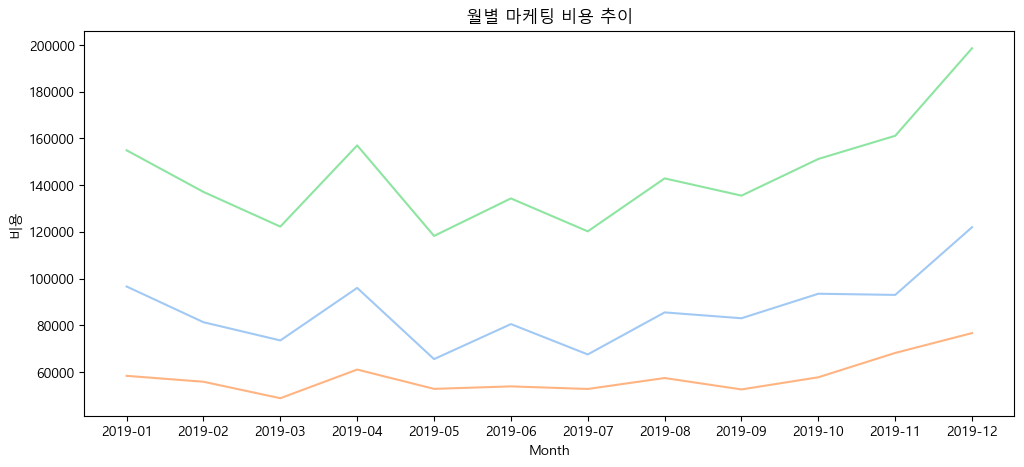

In [24]:
plt.figure(figsize = (12, 5))

sns.lineplot(data = marketing_by_month, x = marketing_by_month.index.astype(str), y = '오프라인비용')
sns.lineplot(data = marketing_by_month, x = marketing_by_month.index.astype(str), y = '온라인비용')
sns.lineplot(data = marketing_by_month, x = marketing_by_month.index.astype(str), y = '총비용')
plt.title('월별 마케팅 비용 추이')
plt.ylabel('비용')
plt.show()

### 고객데이터 시각화

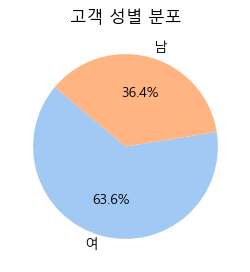

In [25]:
gender_counts = customers_data['성별'].value_counts()

plt.figure(figsize = (3,3))
plt.pie(gender_counts, labels = gender_counts.index, autopct = '%1.1f%%', startangle=140)
plt.title('고객 성별 분포')
plt.show()

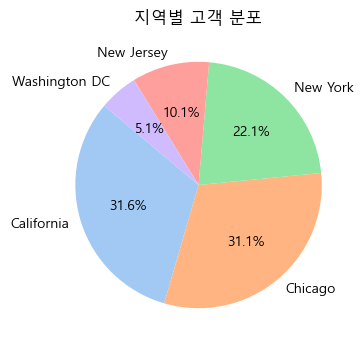

In [26]:
region_counts = customers_data['고객지역'].value_counts()

plt.figure(figsize = (4,4))
plt.pie(region_counts, labels = region_counts.index, autopct = '%1.1f%%', startangle=140)
plt.title('지역별 고객 분포')
plt.show()

In [27]:
def transaction_vis_by_month(df, column, col_values):
    plt.figure(figsize=(10, 4))
    
    for label_name in col_values:
        
        trans_counts_by_month = df.query(f'`{column}` == @label_name').assign(Month = pd.to_datetime(df['거래날짜']).dt.to_period('M'))['Month'].value_counts().sort_index()
        sns.lineplot( x = trans_counts_by_month.index.astype(str), y = trans_counts_by_month.values, label = label_name)
        
    plt.legend()
    plt.xlabel('월')
    
    plt.title(f'월별 {column}에 따른 거래수')
    plt.show()

In [60]:
def usercount_vis_by_month(df, column, col_values):
    plt.figure(figsize=(10, 4))
    
    for label_name in col_values:
        
        trans_counts_by_month = df.query(f'`{column}` == @label_name').assign(Month = pd.to_datetime(online_sales['거래날짜']).dt.to_period('M')).groupby('Month')['고객ID'].nunique()
        sns.lineplot( x = trans_counts_by_month.index.astype(str), y = trans_counts_by_month.values, label = label_name)
        
    plt.legend()
    plt.xlabel('월')
    
    plt.title(f'월별 {column}에 따른 유저수')
    plt.show()

In [29]:
def profit_vis_by_month(df, column, col_values):
    plt.figure(figsize=(10, 4))
    
    for label_name in col_values:
        
        profit_by_month = df.query(f'`{column}` == @label_name').assign(Month = pd.to_datetime(online_sales['거래날짜']).dt.to_period('M'), 
                    total_price = df['수량'] * df['평균금액']).groupby('Month')['total_price'].sum()

        sns.lineplot( x = profit_by_month.index.astype(str), y = profit_by_month.values, label = label_name)
        
    plt.legend()
    plt.xlabel('월')
    
    plt.title(f'월별 {column}에 따른 총거래금액')
    plt.show()

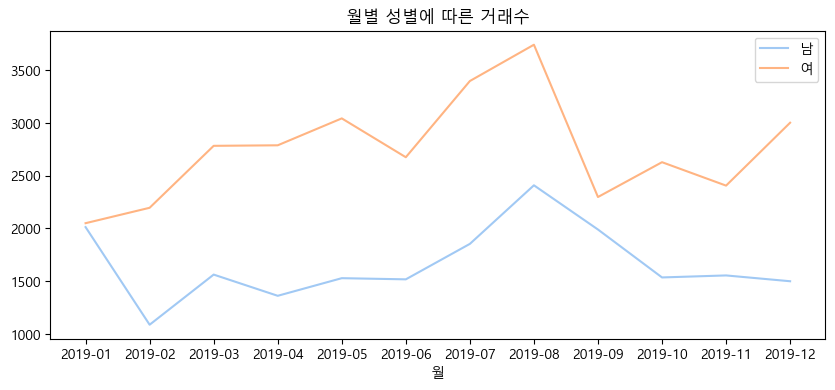

In [30]:
sales_customer_join = pd.merge(online_sales, customers_data, how = 'inner', on = '고객ID' )
transaction_vis_by_month(df = sales_customer_join, column = '성별', col_values = ['남','여'] )

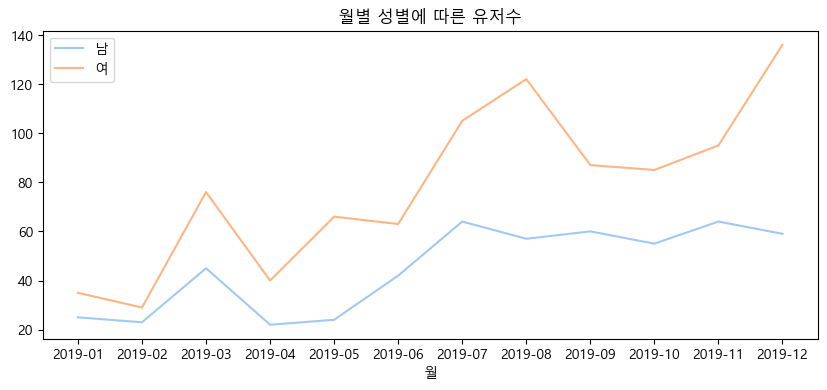

In [61]:
usercount_vis_by_month(df = sales_customer_join, column = '성별', col_values = ['남','여'] )

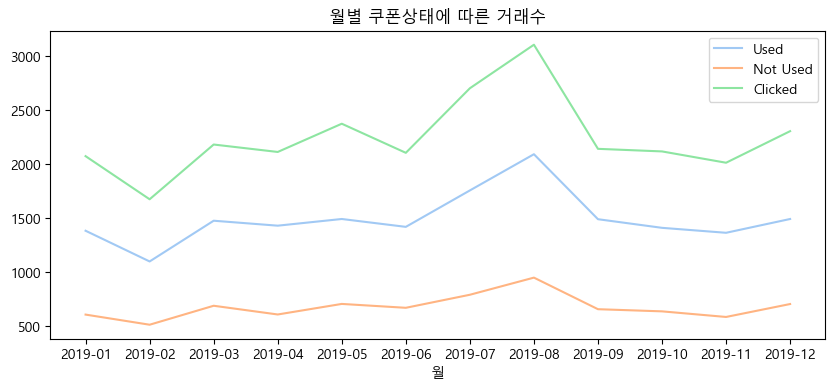

In [32]:
transaction_vis_by_month(df = sales_customer_join, column = '쿠폰상태', col_values = sales_customer_join['쿠폰상태'].unique())

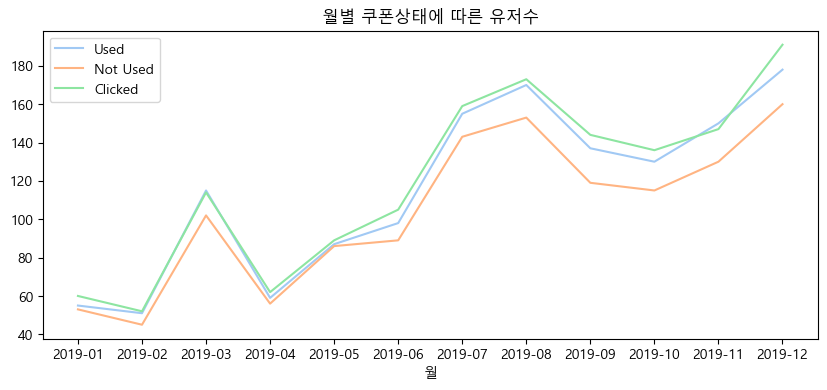

In [33]:
usercount_vis_by_month(df = sales_customer_join, column = '쿠폰상태', col_values = sales_customer_join['쿠폰상태'].unique())

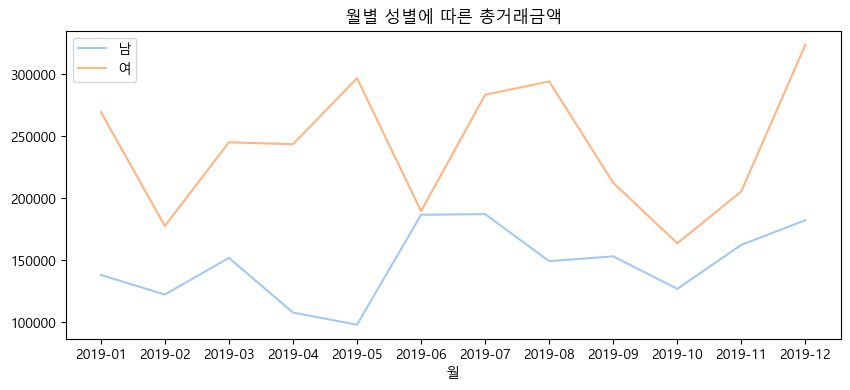

In [34]:
profit_vis_by_month(df = sales_customer_join, column = '성별', col_values = ['남','여'] )

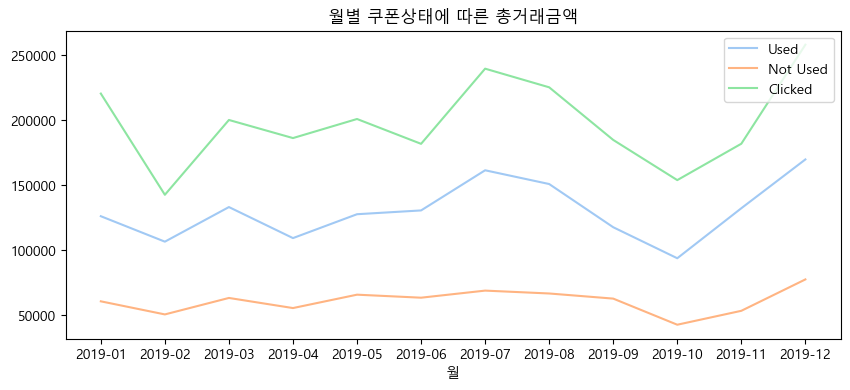

In [35]:
profit_vis_by_month(df = sales_customer_join, column = '쿠폰상태', col_values = sales_customer_join['쿠폰상태'].unique() )

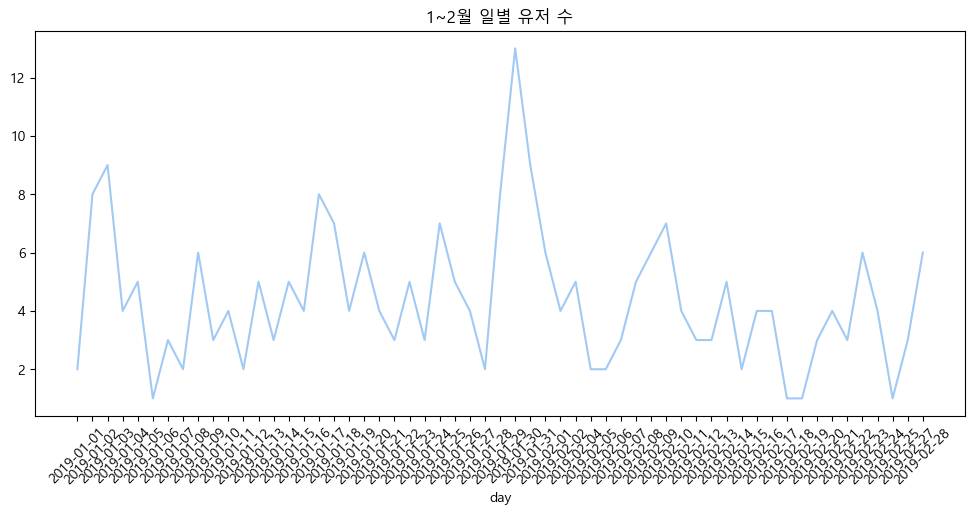

In [67]:
trans_counts_by_day = sales_customer_join.query(f'`성별` == "여" and `거래날짜` < "2019-03-01"').assign(day = pd.to_datetime(sales_customer_join['거래날짜']).dt.to_period('D')).groupby('day')['고객ID'].nunique()

plt.figure(figsize = (12, 5))
sns.lineplot( x = trans_counts_by_day.index.astype(str), y = trans_counts_by_day.values)
plt.xticks(rotation = 45)
plt.title('1~2월 일별 유저 수')
plt.show()

In [36]:
customers_data

,고객ID,성별,고객지역,가입기간
0,USER_1358,남,Chicago,12
1,USER_0190,남,California,43
2,USER_0066,남,Chicago,33
3,USER_0345,여,California,30
4,USER_0683,남,California,49
...,...,...,...,...
1463,USER_0513,여,New York,41
1464,USER_0167,여,Chicago,48
1465,USER_0845,남,New Jersey,19
1466,USER_0504,여,New York,45


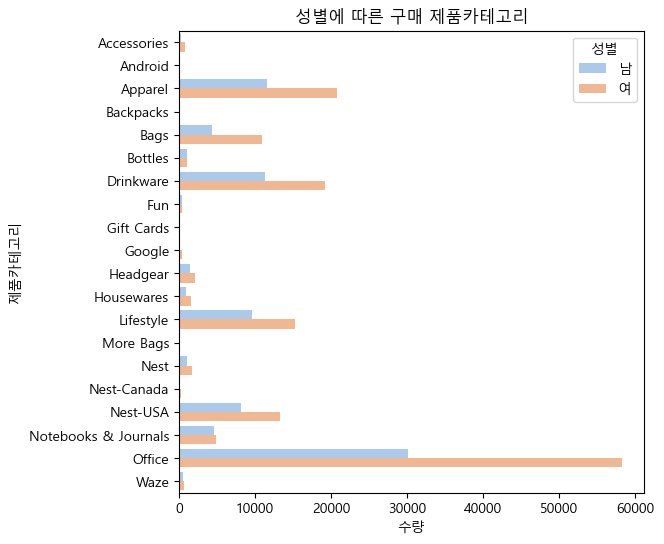

In [37]:
count_cat_by_gender = pd.merge(online_sales, customers_data, how = 'inner', on = '고객ID').groupby(['성별','제품카테고리'])[['수량']].sum().reset_index()

plt.figure(figsize = (6, 6))
sns.barplot(count_cat_by_gender, y = '제품카테고리', x = '수량', hue = '성별')
# plt.xticks(rotation = 45)
plt.title('성별에 따른 구매 제품카테고리')
plt.show()

In [38]:
# 해볼만한 것
# 사용제품의 할인율의 적용여부 혹은 할인 정도에 따라 유저들의 이탈율이 달라질 수 있다. 이에 따른 세그먼트를 해볼 수 있겠고
# 코호트 분석을 어떻게 ;; 

In [39]:
sales_customer_join

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,성별,고객지역,가입기간
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,남,Chicago,12
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,남,Chicago,12
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.50,Used,남,Chicago,12
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.50,Not Used,남,Chicago,12
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.50,Used,남,Chicago,12
...,...,...,...,...,...,...,...,...,...,...,...,...
52919,USER_0504,Transaction_25056,2019-12-31,Product_0976,Nest-USA,1,121.30,6.50,Clicked,여,New York,45
52920,USER_0504,Transaction_25057,2019-12-31,Product_0413,Apparel,1,48.92,6.50,Used,여,New York,45
52921,USER_0504,Transaction_25058,2019-12-31,Product_0989,Nest-USA,1,151.88,6.50,Used,여,New York,45
52922,USER_0562,Transaction_25059,2019-12-31,Product_0985,Nest-USA,5,80.52,6.50,Clicked,여,California,7


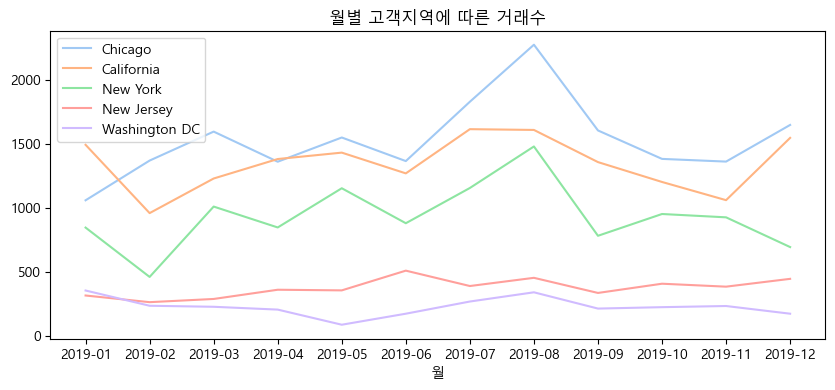

In [40]:
transaction_vis_by_month(df = sales_customer_join, column = '고객지역', col_values = sales_customer_join['고객지역'].unique())

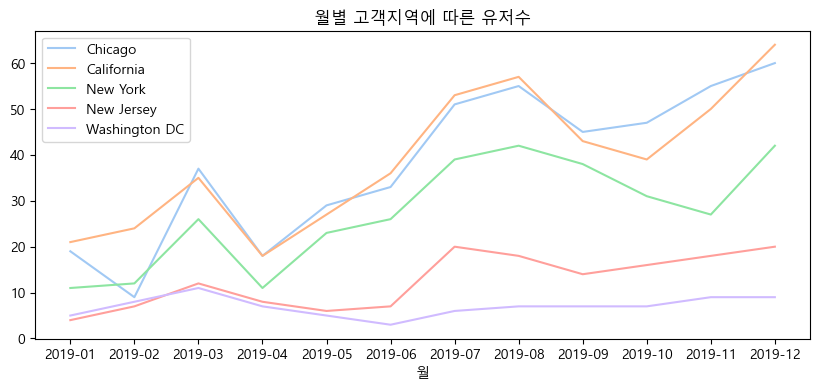

In [41]:
usercount_vis_by_month(df = sales_customer_join, column = '고객지역', col_values = sales_customer_join['고객지역'].unique())

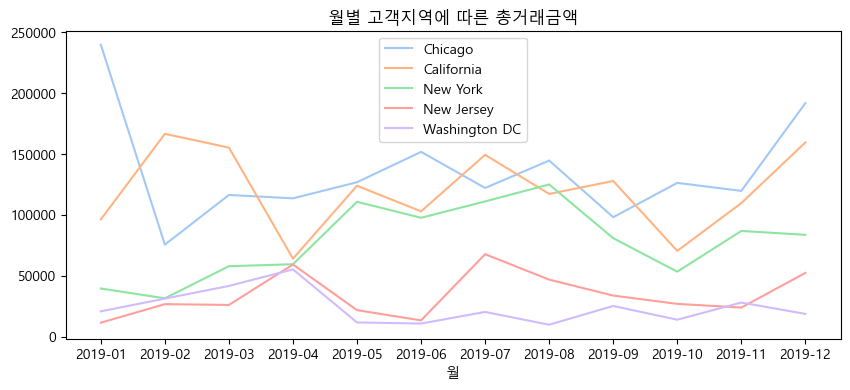

In [42]:
profit_vis_by_month(df = sales_customer_join, column = '고객지역', col_values = sales_customer_join['고객지역'].unique())

In [137]:
sales_customer_join.groupby('제품카테고리')['수량'].sum().sort_values(ascending = False)

제품카테고리
Office                  88383
Apparel                 32438
Drinkware               30501
Lifestyle               24881
Nest-USA                21430
Bags                    15273
Notebooks & Journals     9556
Headgear                 3533
Nest                     2837
Housewares               2484
Bottles                  2090
Waze                     1144
Accessories              1097
Fun                       834
Google                    575
Nest-Canada               469
Gift Cards                206
More Bags                 144
Backpacks                 113
Android                    45
Name: 수량, dtype: int64

In [43]:
sales_customer_join.groupby('제품카테고리')['고객ID'].count().sort_values(ascending = False)

제품카테고리
Apparel                 18126
Nest-USA                14013
Office                   6513
Drinkware                3483
Lifestyle                3092
Nest                     2198
Bags                     1882
Headgear                  771
Notebooks & Journals      749
Waze                      554
Nest-Canada               317
Bottles                   268
Accessories               234
Fun                       160
Gift Cards                159
Housewares                122
Google                    105
Backpacks                  89
More Bags                  46
Android                    43
Name: 고객ID, dtype: int64

## Cohort
- 첫 구매월  
- 쿠폰  
- apparel, usa-nest  
- 지역  
각 코호트 별 유저 감소세를 파악해보자

In [99]:
# 첫 거래 달 계산
cohort_first_buy_month = online_sales.merge(online_sales.groupby('고객ID')['거래날짜'].min().reset_index(), on = '고객ID').rename(columns = {'거래날짜_x' : '거래날짜','거래날짜_y' : '첫거래일'})
cohort_first_buy_month = cohort_first_buy_month.assign(month_f = pd.to_datetime(cohort_first_buy_month['첫거래일']).dt.to_period('M'), month_n = pd.to_datetime(cohort_first_buy_month['거래날짜']).dt.to_period('M') )
cohort_first_buy_month.head(10)


,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,첫거래일,month_f,month_n
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,2019-01-01,2019-01,2019-01
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,2019-01-01,2019-01,2019-01
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.5,Used,2019-01-01,2019-01,2019-01
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.5,Not Used,2019-01-01,2019-01,2019-01
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.5,Used,2019-01-01,2019-01,2019-01
5,USER_1358,Transaction_0003,2019-01-01,Product_0854,Bags,15,5.15,6.5,Used,2019-01-01,2019-01,2019-01
6,USER_1358,Transaction_0003,2019-01-01,Product_0880,Drinkware,15,3.08,6.5,Not Used,2019-01-01,2019-01,2019-01
7,USER_1358,Transaction_0003,2019-01-01,Product_0885,Drinkware,15,10.31,6.5,Clicked,2019-01-01,2019-01,2019-01
8,USER_1358,Transaction_0003,2019-01-01,Product_0898,Drinkware,5,9.27,6.5,Used,2019-01-01,2019-01,2019-01
9,USER_1358,Transaction_0013,2019-01-01,Product_0973,Lifestyle,1,1.24,6.5,Used,2019-01-01,2019-01,2019-01


In [133]:
cohort_first_buy_month.groupby(['month_f', 'month_n'])[['고객ID']].nunique().head(12)

고객ID
month_f month_n      
2019-01 2019-01   215
        2019-02    13
        2019-03    24
        2019-04    34
        2019-05    23
        2019-06    44
        2019-07    35
        2019-08    47
        2019-09    23
        2019-10    28
        2019-11    20
        2019-12    34

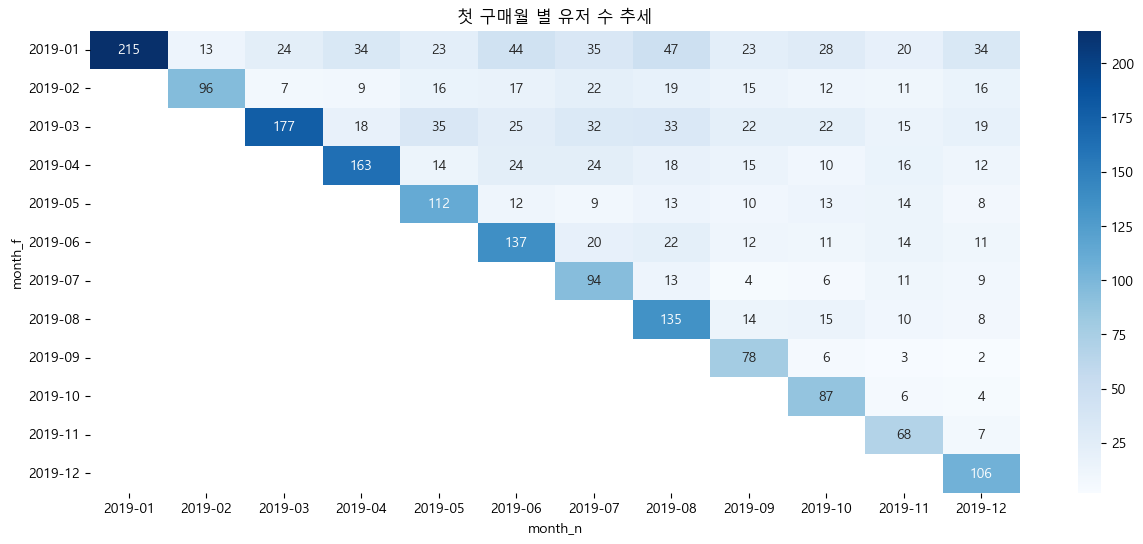

In [135]:
c1 = cohort_first_buy_month.groupby(['month_f', 'month_n'])[['고객ID']].nunique().reset_index().pivot_table(index = 'month_f', columns = 'month_n', values = '고객ID')

plt.figure(figsize = (15, 6))
sns.heatmap(c1, annot = True, cmap = 'Blues', fmt = '.0f')
plt.title('첫 구매월 별 유저 수 추세')
plt.show()

In [150]:
online_sales.query('`제품카테고리` == "Apparel"').assign(month = pd.to_datetime(online_sales['거래날짜']).dt.to_period('M')).groupby('month')['고객ID'].nunique()

month
2019-01    164
2019-02     99
2019-03    172
2019-04    184
2019-05    165
2019-06    227
2019-07    201
2019-08    271
2019-09    164
2019-10    157
2019-11    146
2019-12    188
Freq: M, Name: 고객ID, dtype: int64

## RFM
- R, F, M 계산 후 군집모델을 통해 유저 그룹화 
- 각 그룹별 특성을 보고 세그먼트 정의

In [64]:
rfm_online_sales = online_sales.copy()

# 
rfm_online_sales['거래날짜'] = pd.to_datetime(rfm_online_sales['거래날짜'])
last_date = rfm_online_sales['거래날짜'].max()

# recency
recency_data = rfm_online_sales.groupby('고객ID')['거래날짜'].max().reset_index()
recency_data['Recency'] = (last_date - recency_data['거래날짜']).dt.days

# frequency
frequency_data = rfm_online_sales.groupby('고객ID')['거래ID'].count().reset_index()
frequency_data.rename(columns = {'거래ID' : 'Frequency'}, inplace = True)

# monetary
rfm_online_sales['SalesValue'] = rfm_online_sales['수량'] * rfm_online_sales['평균금액']
monetary_data = rfm_online_sales.groupby('고객ID')['SalesValue'].sum().reset_index()
monetary_data.rename(columns = {'SalesValue':'Monetary'}, inplace = True)

rfm_data = recency_data.merge(frequency_data, on = '고객ID').merge(monetary_data, on = '고객ID')

# 성별 분할 
rfm_data_f = pd.merge(rfm_data, customers_data, how = 'inner', on = '고객ID').query('`성별` == "여"')
rfm_data_m = pd.merge(rfm_data, customers_data, how = 'inner', on = '고객ID').query('`성별` == "남"')

# R, F, M 점수 부여
rfm_data['R_score'] = pd.qcut(rfm_data['Recency'], 4, labels = [4, 3, 2, 1])
rfm_data['F_score'] = pd.qcut(rfm_data['Frequency'], 4, labels = [1, 2, 3, 4])
rfm_data['M_score'] = pd.qcut(rfm_data['Monetary'], 4, labels = [1, 2, 3, 4])

rfm_data_f['R_score'] = pd.qcut(rfm_data_f['Recency'], 4, labels = [4, 3, 2, 1])
rfm_data_f['F_score'] = pd.qcut(rfm_data_f['Frequency'], 4, labels = [1, 2, 3, 4])
rfm_data_f['M_score'] = pd.qcut(rfm_data_f['Monetary'], 4, labels = [1, 2, 3, 4])

rfm_data_m['R_score'] = pd.qcut(rfm_data_m['Recency'], 4, labels = [4, 3, 2, 1])
rfm_data_m['F_score'] = pd.qcut(rfm_data_m['Frequency'], 4, labels = [1, 2, 3, 4])
rfm_data_m['M_score'] = pd.qcut(rfm_data_m['Monetary'], 4, labels = [1, 2, 3, 4])



rfm_data['RFM_Score'] = rfm_data['R_score'].astype('str') + rfm_data['F_score'].astype(str) + rfm_data['M_score'].astype(str)
rfm_data_f['RFM_Score'] = rfm_data_f['R_score'].astype('str') + rfm_data_f['F_score'].astype(str) + rfm_data_f['M_score'].astype(str)
rfm_data_m['RFM_Score'] = rfm_data_m['R_score'].astype('str') + rfm_data_m['F_score'].astype(str) + rfm_data_m['M_score'].astype(str)

rfm_data.head()

,고객ID,거래날짜,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score
0,USER_0000,2019-09-15,107,2,30.99,3,1,1,311
1,USER_0001,2019-11-02,59,60,13834.90,3,4,4,344
2,USER_0002,2019-10-19,73,23,1442.12,3,3,2,332
3,USER_0003,2019-12-14,17,17,1360.07,4,2,2,422
4,USER_0004,2019-09-15,107,36,1442.47,3,3,2,332


In [70]:
customers_data.가입기간.describe()

count    1468.000000
mean       25.912125
std        13.959667
min         2.000000
25%        14.000000
50%        26.000000
75%        38.000000
max        50.000000
Name: 가입기간, dtype: float64

In [67]:
rfm_data[['Recency', 'Frequency', 'Monetary']].describe()

,Recency,Frequency,Monetary
count,1468.000000,1468.000000,1468.000000
mean,144.292234,36.051771,3181.740204
std,101.936959,50.885680,5065.804553
min,0.000000,1.000000,1.000000
25%,55.000000,10.000000,652.412500
50%,131.000000,21.000000,1750.410000
75%,220.000000,46.000000,3917.887500
max,364.000000,695.000000,75937.550000


In [46]:
rfm_data['R_score'] = rfm_data.R_score.astype('int')
rfm_data['F_score'] = rfm_data.F_score.astype('int')
rfm_data['M_score'] = rfm_data.M_score.astype('int')

In [47]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
from sklearn.decomposition import PCA

rfm_data_scaled = rfm_data.copy()

rfm_data_scaled.Monetary = np.log(rfm_data['Monetary'])
rfm_data_scaled.Frequency = np.log(rfm_data['Frequency'])

sd = StandardScaler()

rfm_data_scaled.loc[:,['Recency', 'Frequency', 'Monetary']] = sd.fit_transform(rfm_data_scaled[['Recency', 'Frequency', 'Monetary']])
rfm_data_scaled

,고객ID,거래날짜,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score
0,USER_0000,2019-09-15,-0.365961,-1.843578,-2.359827,3,1,1,311
1,USER_0001,2019-11-02,-0.837001,0.936933,1.459553,3,4,4,344
2,USER_0002,2019-10-19,-0.699614,0.153064,0.044126,3,3,2,332
3,USER_0003,2019-12-14,-1.249160,-0.094053,0.007457,4,2,2,422
4,USER_0004,2019-09-15,-0.365961,0.519329,0.044278,3,3,2,332
...,...,...,...,...,...,...,...,...,...
1463,USER_1463,2019-04-05,1.233611,-0.819432,-0.565779,1,1,1,111
1464,USER_1464,2019-10-05,-0.562227,0.605462,0.353267,3,3,3,333
1465,USER_1465,2019-06-20,0.487799,-0.710269,-1.616779,2,1,1,211
1466,USER_1466,2019-10-23,-0.738867,-2.410232,-0.942929,3,1,1,311


In [56]:
rfm_data_scaled = pd.merge(rfm_data_scaled, customers_data, how = 'inner', on = '고객ID')
rfm_data_scaled

,고객ID,거래날짜,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score,cluster,성별,고객지역,가입기간
0,USER_0000,2019-09-15,-0.365961,-1.843578,-2.359827,3,1,1,311,1,여,New York,31
1,USER_0001,2019-11-02,-0.837001,0.936933,1.459553,3,4,4,344,0,남,New York,20
2,USER_0002,2019-10-19,-0.699614,0.153064,0.044126,3,3,2,332,2,남,California,39
3,USER_0003,2019-12-14,-1.249160,-0.094053,0.007457,4,2,2,422,2,남,California,25
4,USER_0004,2019-09-15,-0.365961,0.519329,0.044278,3,3,2,332,0,여,Chicago,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,USER_1463,2019-04-05,1.233611,-0.819432,-0.565779,1,1,1,111,3,여,California,5
1464,USER_1464,2019-10-05,-0.562227,0.605462,0.353267,3,3,3,333,0,남,New York,43
1465,USER_1465,2019-06-20,0.487799,-0.710269,-1.616779,2,1,1,211,1,남,Chicago,25
1466,USER_1466,2019-10-23,-0.738867,-2.410232,-0.942929,3,1,1,311,1,여,Chicago,47


In [48]:
# for i in range(3, 16):
#     km = KMeans(n_clusters = i, init = 'k-means++')
#     km.fit(rfm_data_scaled[['Recency', 'Frequency', 'Monetary']])
#     rfm_data_scaled['cluster'] = km.labels_
#     score_samples = silhouette_samples(rfm_data_scaled[['Recency', 'Frequency', 'Monetary']], rfm_data_scaled['cluster'])
#     rfm_data_scaled['silhouette_samples'] = score_samples
    
#     pca = PCA(n_components = 2)
#     pca_transformed = pca.fit_transform(rfm_data_scaled[['Recency', 'Frequency', 'Monetary']])
#     rfm_data_scaled['pca_x'] = pca_transformed[:,0]
#     rfm_data_scaled['pca_y'] = pca_transformed[:,1]
    
#     print('전체 스코어 평균 :', np.round(score_samples.mean(),3))
#     print('------그룹별 유저 수------')
#     display(rfm_data_scaled.groupby('cluster')['고객ID'].count())
#     print('------그룹별 스코어 평균------')
#     display(rfm_data_scaled.groupby('cluster')['silhouette_samples'].mean())
#     print(f'-------{i} cluster, RFM-------')
#     display(rfm_data_scaled.groupby('cluster')[['R_score', 'F_score', 'M_score']].mean().apply(lambda x: round(x, 1)).sort_values(['R_score', 'F_score', 'M_score']))
#     print('-------------------------')
    
#     plt.figure(figsize = (5,5))
#     for j in range(i):
#         ind = rfm_data_scaled[rfm_data_scaled['cluster'] == j].index
        
#         plt.scatter(x = rfm_data_scaled.loc[ind, 'pca_x'], y = rfm_data_scaled.loc[ind, 'pca_y'], label = f'{j}')
#         plt.xlabel('pca1')
#         plt.ylabel('pca2')
#         plt.legend()
#     plt.show()
    

In [49]:
km = KMeans(n_clusters = 4, init = 'k-means++', random_state = 2024)
km.fit(rfm_data_scaled[['Recency', 'Frequency', 'Monetary']])
rfm_data_scaled['cluster'] = km.labels_

rfm_data_scaled


,고객ID,거래날짜,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score,cluster
0,USER_0000,2019-09-15,-0.365961,-1.843578,-2.359827,3,1,1,311,1
1,USER_0001,2019-11-02,-0.837001,0.936933,1.459553,3,4,4,344,0
2,USER_0002,2019-10-19,-0.699614,0.153064,0.044126,3,3,2,332,2
3,USER_0003,2019-12-14,-1.249160,-0.094053,0.007457,4,2,2,422,2
4,USER_0004,2019-09-15,-0.365961,0.519329,0.044278,3,3,2,332,0
...,...,...,...,...,...,...,...,...,...,...
1463,USER_1463,2019-04-05,1.233611,-0.819432,-0.565779,1,1,1,111,3
1464,USER_1464,2019-10-05,-0.562227,0.605462,0.353267,3,3,3,333,0
1465,USER_1465,2019-06-20,0.487799,-0.710269,-1.616779,2,1,1,211,1
1466,USER_1466,2019-10-23,-0.738867,-2.410232,-0.942929,3,1,1,311,1


In [51]:
rfm_data['cluster'] = km.labels_

0 : 찍먹고객     
1 : 이탈고객  
2 : 신규고객  
3 : vip

In [52]:
rfm_data.groupby('cluster')[['R_score', 'F_score', 'M_score']].mean().apply(lambda x : np.round(x, 1))

,R_score,F_score,M_score
cluster,,,
0,3.3,3.6,3.6
1,1.8,1.0,1.0
2,3.1,1.8,1.8
3,1.3,2.5,2.5


In [55]:
rfm_data = pd.merge(rfm_data, customers_data, how = 'inner', on = '고객ID')
rfm_data

,고객ID,거래날짜,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score,cluster,성별,고객지역,가입기간
0,USER_0000,2019-09-15,107,2,30.99,3,1,1,311,1,여,New York,31
1,USER_0001,2019-11-02,59,60,13834.90,3,4,4,344,0,남,New York,20
2,USER_0002,2019-10-19,73,23,1442.12,3,3,2,332,2,남,California,39
3,USER_0003,2019-12-14,17,17,1360.07,4,2,2,422,2,남,California,25
4,USER_0004,2019-09-15,107,36,1442.47,3,3,2,332,0,여,Chicago,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,USER_1463,2019-04-05,270,7,544.34,1,1,1,111,3,여,California,5
1464,USER_1464,2019-10-05,87,40,2363.05,3,3,3,333,0,남,New York,43
1465,USER_1465,2019-06-20,194,8,101.56,2,1,1,211,1,남,Chicago,25
1466,USER_1466,2019-10-23,69,1,298.00,3,1,1,311,1,여,Chicago,47


In [46]:
online_sales

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.50,Used
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.50,Not Used
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.50,Used
...,...,...,...,...,...,...,...,...,...
52919,USER_0504,Transaction_25056,2019-12-31,Product_0976,Nest-USA,1,121.30,6.50,Clicked
52920,USER_0504,Transaction_25057,2019-12-31,Product_0413,Apparel,1,48.92,6.50,Used
52921,USER_0504,Transaction_25058,2019-12-31,Product_0989,Nest-USA,1,151.88,6.50,Used
52922,USER_0562,Transaction_25059,2019-12-31,Product_0985,Nest-USA,5,80.52,6.50,Clicked


In [54]:
idlist = rfm_data.query('`cluster` == 0').고객ID.to_list() 
churn_user = online_sales.query('`고객ID` in @idlist')

In [48]:
discount_coupon.query('`제품카테고리` == "Apparel"')

,월,제품카테고리,쿠폰코드,할인율
0,2019-01,Apparel,SALE10,10
1,2019-02,Apparel,SALE20,20
2,2019-03,Apparel,SALE30,30
51,2019-04,Apparel,SALE10,10
52,2019-05,Apparel,SALE20,20
53,2019-06,Apparel,SALE30,30
102,2019-07,Apparel,SALE10,10
103,2019-08,Apparel,SALE20,20
104,2019-09,Apparel,SALE30,30
153,2019-10,Apparel,SALE10,10


In [49]:
rfm_data.assign(이탈월 = (pd.to_datetime(rfm_data['거래날짜']).dt.to_period('M')+1)).groupby('이탈월')['고객ID'].count()

이탈월
2019-02     96
2019-03     31
2019-04     74
2019-05     99
2019-06     83
2019-07    118
2019-08    113
2019-09    166
2019-10    138
2019-11    154
2019-12    160
2020-01    236
Freq: M, Name: 고객ID, dtype: int64

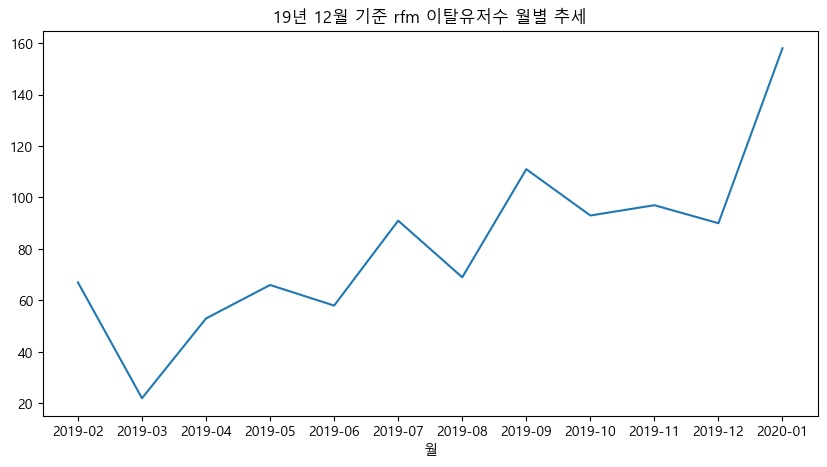

In [57]:
churn = churn_user.assign(이탈월 = (pd.to_datetime(rfm_data['거래날짜']).dt.to_period('M')+1)).groupby('이탈월')['고객ID'].count()

plt.figure(figsize = (10,5))
sns.lineplot(data =churn, x = churn.index.astype('str'), y = churn.values)
plt.title('19년 12월 기준 rfm 이탈유저수 월별 추세')
plt.xlabel('월')
plt.show()

In [75]:
online_sales.query('`고객ID` in @idlist')

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태
65,USER_0683,Transaction_0023,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Clicked
82,USER_0730,Transaction_0035,2019-01-01,Product_0416,Apparel,1,15.67,6.50,Used
83,USER_0730,Transaction_0035,2019-01-01,Product_0638,Apparel,1,61.89,6.50,Clicked
939,USER_1389,Transaction_0490,2019-01-07,Product_0518,Apparel,1,46.21,6.50,Not Used
940,USER_1389,Transaction_0491,2019-01-07,Product_0983,Nest-USA,1,122.77,6.50,Not Used
...,...,...,...,...,...,...,...,...,...
52919,USER_0504,Transaction_25056,2019-12-31,Product_0976,Nest-USA,1,121.30,6.50,Clicked
52920,USER_0504,Transaction_25057,2019-12-31,Product_0413,Apparel,1,48.92,6.50,Used
52921,USER_0504,Transaction_25058,2019-12-31,Product_0989,Nest-USA,1,151.88,6.50,Used
52922,USER_0562,Transaction_25059,2019-12-31,Product_0985,Nest-USA,5,80.52,6.50,Clicked


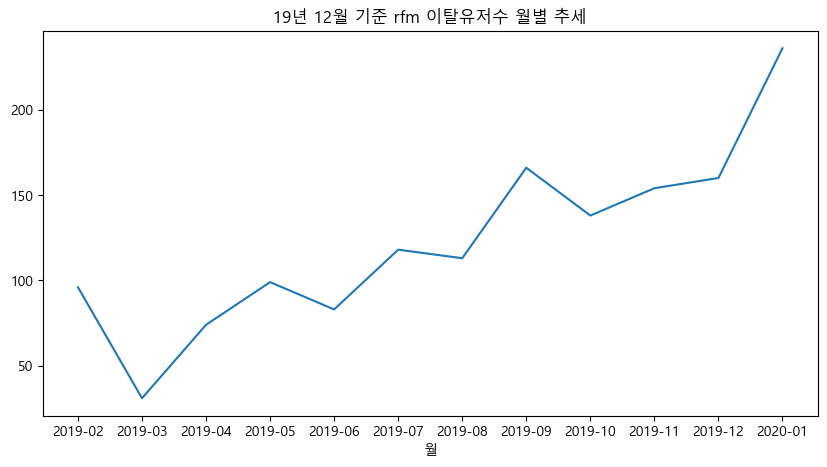

In [77]:
idlist = rfm_data.query('`cluster` == 1').고객ID.to_list() 
vip_user = online_sales.query('`고객ID` in @idlist')

vip_user = rfm_data.assign(이탈월 = (pd.to_datetime(rfm_data['거래날짜']).dt.to_period('M')+1)).groupby('이탈월')['고객ID'].count()

plt.figure(figsize = (10,5))
sns.lineplot(data =vip_user, x = vip_user.index.astype('str'), y = vip_user.values)
plt.title('19년 12월 기준 rfm 이탈유저수 월별 추세')
plt.xlabel('월')
plt.show()

In [ ]:
rfm_data.query('`cluster` == 2').고객ID.to_list() 

In [52]:
customers_data.query('`고객ID` in @idlist')

,고객ID,성별,고객지역,가입기간
4,USER_0683,남,California,49
5,USER_0730,남,California,32
46,USER_1389,여,Chicago,36
60,USER_1129,여,New York,15
63,USER_1438,여,California,26
...,...,...,...,...
1460,USER_0629,여,New Jersey,14
1463,USER_0513,여,New York,41
1465,USER_0845,남,New Jersey,19
1466,USER_0504,여,New York,45


In [96]:
rfm_data.query('`cluster` == 1').Monetary.mean()

2440.98187012987

In [81]:
churn_user.성별.value_counts()

쿠폰상태
Clicked     5669
Used        3660
Not Used    1691
Name: count, dtype: int64

In [52]:
# DBscan, 계층 군집.

In [53]:
pd.crosstab(rfm_data.R_score, rfm_data.F_score)

F_score,1,2,3,4
R_score,,,,
1,140,95,72,59
2,111,100,81,69
3,87,77,103,105
4,58,80,103,128


In [54]:
pd.crosstab(rfm_data.F_score, rfm_data.M_score)

M_score,1,2,3,4
F_score,,,,
1,295,91,10,0
2,70,200,80,2
3,2,74,219,64
4,0,2,58,301


In [55]:
pd.crosstab(rfm_data.M_score, rfm_data.R_score)

R_score,1,2,3,4
M_score,,,,
1,125,120,84,38
2,105,103,87,72
3,77,83,99,108
4,59,55,102,151
